## How did US tariffs impact the stock market

## Key Takeaways
- **Sector-Specific Benefits and Challenges:** Tariffs benefited domestic steel producers like Nucor but introduced challenges for aluminum producers like Alcoa due to trade complexities.
- **Automaker Struggles:** Ford and General Motors faced increased costs from tariffs on steel and aluminum, negatively impacting their stock performance.
- **Market Volatility:** The S&P 500 experienced increased volatility post-tariff implementation, reflecting market-wide uncertainty about economic impacts.
- **Correlation Insights:** Metal producers showed moderate correlation due to shared tariff exposure, while automakers had strong correlation reflecting similar industry dynamics.

## Import Librairies

In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Get the Data from Yahoo Finance and set up the parameters

In [42]:
start_date = '2024-07-01'
end_date = '2025-03-15'

nucor = yf.download('NUE', start=start_date, end=end_date)        
alcoa = yf.download('AA', start=start_date, end=end_date)         
ford = yf.download('F', start=start_date, end=end_date)
general_motors = yf.download('GM', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

nucor.index = pd.to_datetime(nucor.index)
alcoa.index = pd.to_datetime(alcoa.index)
ford.index = pd.to_datetime(ford.index)
general_motors.index = pd.to_datetime(general_motors.index)
sp500.index = pd.to_datetime(sp500.index)

election_date = pd.to_datetime('2024-11-05')
tariff_announcement_date = pd.to_datetime('2025-02-01')
tariff_implementation_date = pd.to_datetime('2025-03-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Returns and Summary Statistics

In [43]:
# Returns
nucor['Returns'] = nucor['Close'].pct_change().dropna()
alcoa['Returns'] = alcoa['Close'].pct_change().dropna()
ford['Returns'] = ford['Close'].pct_change().dropna()
general_motors['Returns'] = general_motors['Close'].pct_change().dropna()
sp500['Returns'] = sp500['Close'].pct_change().dropna()

# Summary statistics of returns
print("Nucor returns summary:", nucor['Returns'].describe())
print("\nAlcoa returns summary:", alcoa['Returns'].describe())
print("\nFord returns summary:", ford['Returns'].describe())
print("\nGeneral Motors returns summary:", general_motors['Returns'].describe())
print("\nS&P 500 returns summary:", sp500['Returns'].describe())

Nucor returns summary: count    176.000000
mean      -0.000660
std        0.023718
min       -0.064634
25%       -0.012955
50%       -0.000041
75%        0.012130
max        0.159947
Name: Returns, dtype: float64

Alcoa returns summary: count    176.000000
mean      -0.000450
std        0.030353
min       -0.079705
25%       -0.018511
50%       -0.000388
75%        0.017224
max        0.090808
Name: Returns, dtype: float64

Ford returns summary: count    176.000000
mean      -0.000886
std        0.024217
min       -0.183614
25%       -0.011571
50%        0.002430
75%        0.012017
max        0.058114
Name: Returns, dtype: float64

General Motors returns summary: count    176.000000
mean       0.000527
std        0.023982
min       -0.089867
25%       -0.010366
50%        0.001864
75%        0.012364
max        0.098099
Name: Returns, dtype: float64

S&P 500 returns summary: count    176.000000
mean       0.000212
std        0.009418
min       -0.029969
25%       -0.004420
50%        

## Cumulative Returns

Having a few stocks to analyse/vizualise, we create a dictionary that would be used in a loop

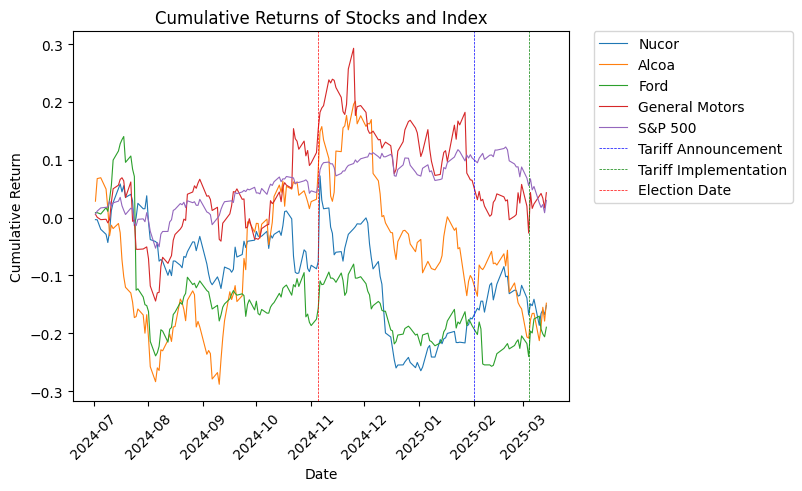

In [44]:
cumulative_returns = {
    'Nucor': (1 + nucor['Returns']).cumprod() - 1,
    'Alcoa': (1 + alcoa['Returns']).cumprod() - 1,
    'Ford': (1 + ford['Returns']).cumprod() - 1,
    'General Motors': (1 + general_motors['Returns']).cumprod() - 1,
    'S&P 500': (1 + sp500['Returns']).cumprod() - 1
}


for name, data in cumulative_returns.items():
    plt.plot(data.index, data, label=name, linewidth=0.8)

plt.axvline(x=tariff_announcement_date, color='b', linestyle='--', linewidth=0.5, label='Tariff Announcement')
plt.axvline(x=tariff_implementation_date, color='g', linestyle='--', linewidth=0.5, label='Tariff Implementation')
plt.axvline(x=election_date, color='r', linestyle='--', linewidth=0.5, label='Election Date')
plt.title('Cumulative Returns of Stocks and Index')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Prices

Again, we store the stocks into a dictionary to generate a loop

We want to observe how price changed during the period, getting mean prices for before US presidential election, between tariff announcement and implementation dates, and after implementation date.

*Note: the analysis was made in March 2025, before the April tariffs announcement.*


Nucor closing price before election: [148.27504612]
Nucor closing price after tariff announcement: [134.69784982]
Nucor closing price after tariff implementation: [130.16805352]


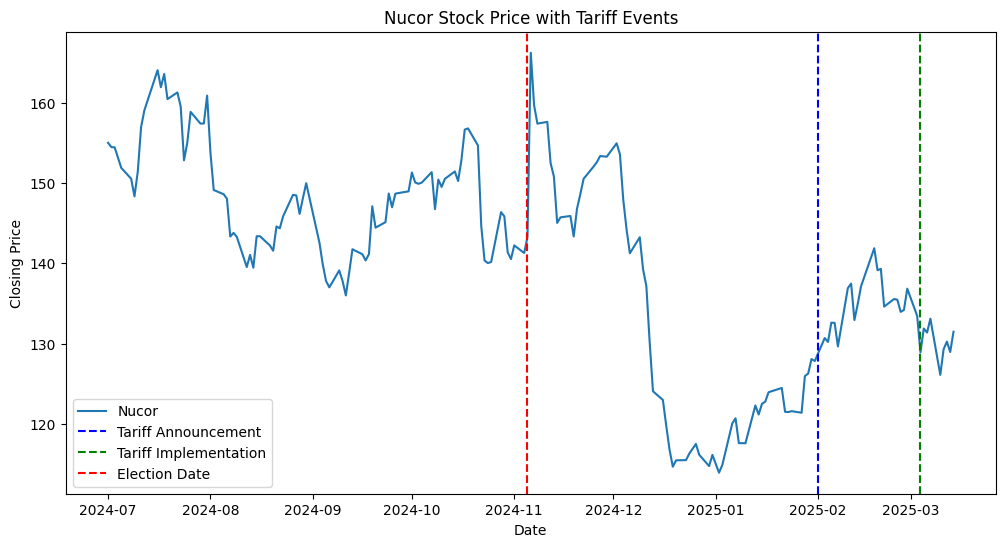


Alcoa closing price before election: [35.71815883]
Alcoa closing price after tariff announcement: [35.06057912]
Alcoa closing price after tariff implementation: [32.35888905]


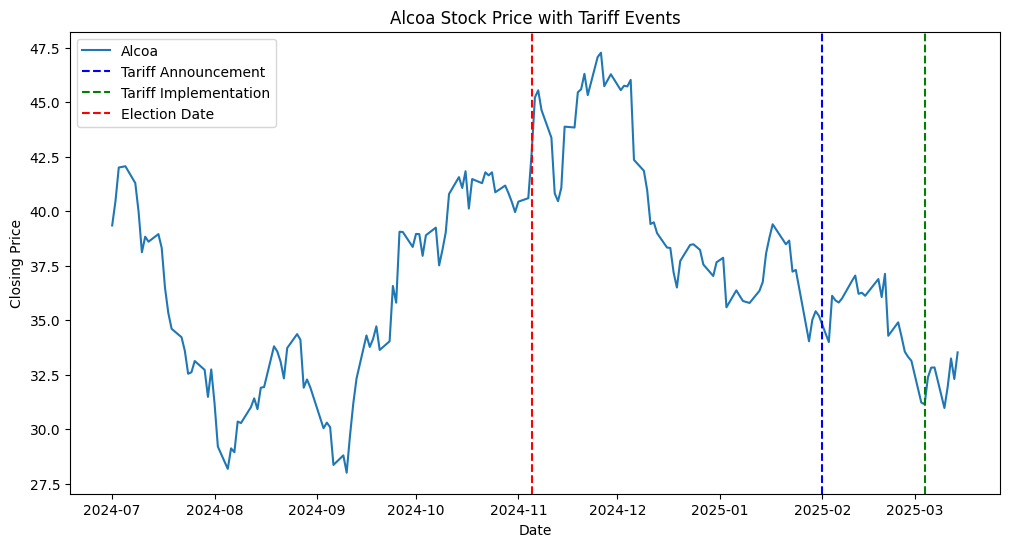


Ford closing price before election: [10.68483997]
Ford closing price after tariff announcement: [9.28340262]
Ford closing price after tariff implementation: [9.64222198]


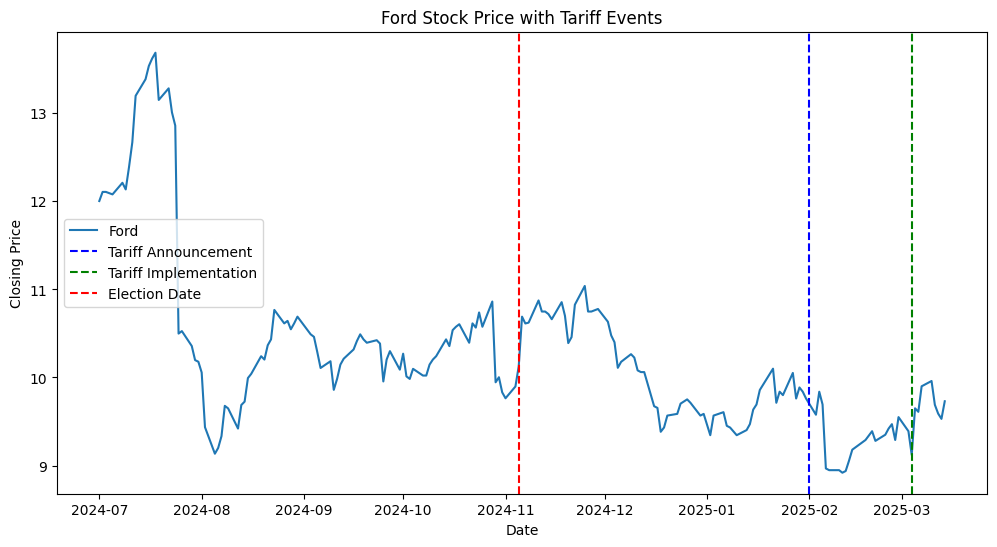


General Motors closing price before election: [46.93461164]
General Motors closing price after tariff announcement: [47.40441132]
General Motors closing price after tariff implementation: [47.52130932]


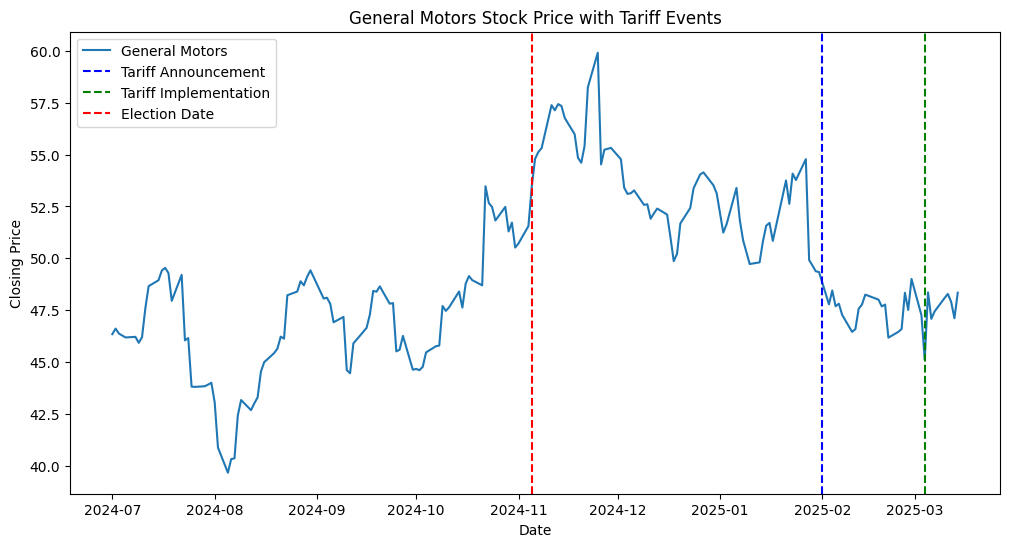


S&P 500 closing price before election: [5613.66254883]
S&P 500 closing price after tariff announcement: [6017.28473772]
S&P 500 closing price after tariff implementation: [5675.09884983]


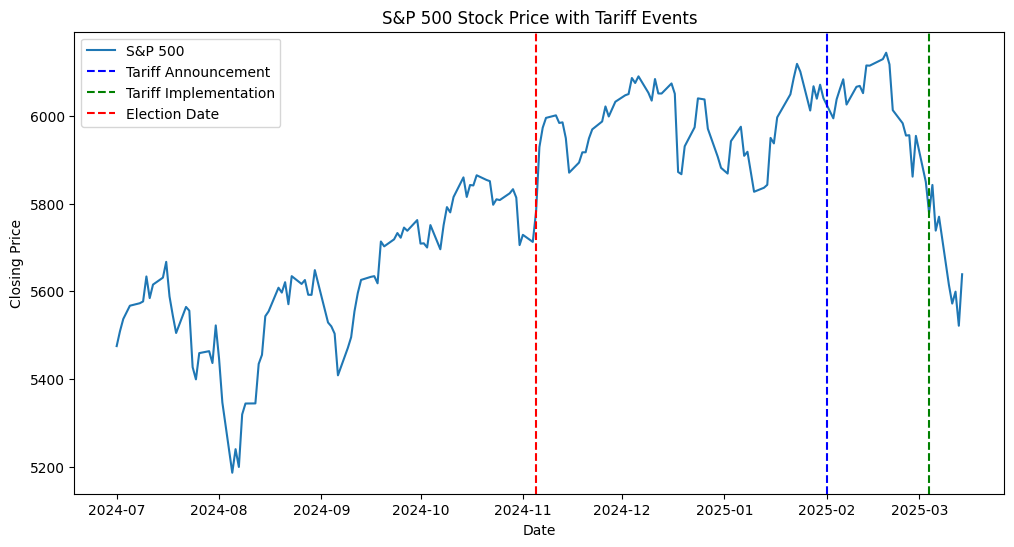

In [45]:
stocks = {
    'Nucor': nucor, # For Steel
    'Alcoa': alcoa, # For Aluminium (or Aluminum)
    'Ford': ford, # For Automakers
    'General Motors': general_motors,
    'S&P 500': sp500 # Index
}

for name, df in stocks.items():
    before = df.loc[:election_date, 'Close'].mean()
    between = df.loc[tariff_announcement_date:tariff_implementation_date, 'Close'].mean()
    after = df.loc[tariff_implementation_date:, 'Close'].mean()

    print(f"\n{name} closing price before election: {before.values}")
    print(f"{name} closing price after tariff announcement: {between.values}")
    print(f"{name} closing price after tariff implementation: {after.values}")


    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Close'], label=name)
    
    plt.axvline(x=tariff_announcement_date, color='b', linestyle='--', label='Tariff Announcement')
    plt.axvline(x=tariff_implementation_date, color='g', linestyle='--', label='Tariff Implementation')
    plt.axvline(x=election_date, color='r', linestyle='--', label='Election Date')

    plt.title(f'{name} Stock Price with Tariff Events')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

## Volatility

We compute volatility for each stock using the stock dictionary used before for prices

In [46]:
for name, df in stocks.items():
    before_vol = df.loc[:election_date, 'Returns'].std()
    between_vol = df.loc[tariff_announcement_date:tariff_implementation_date, 'Returns'].std()
    after_vol = df.loc[tariff_implementation_date:, 'Returns'].std()

    print(f"\n{name} volatility before election: {before_vol}")
    print(f"{name} volatility after tariff announcement: {between_vol}")
    print(f"{name} volatility after tariff implementation: {after_vol}")


Nucor volatility before election: 0.019451046333414712
Nucor volatility after tariff announcement: 0.023533898867403317
Nucor volatility after tariff implementation: 0.02689110390459865

Alcoa volatility before election: 0.03160897362981446
Alcoa volatility after tariff announcement: 0.029820130350690244
Alcoa volatility after tariff implementation: 0.033875421109501994

Ford volatility before election: 0.027888679063732248
Ford volatility after tariff announcement: 0.022202112997651735
Ford volatility after tariff implementation: 0.02811284693142688

General Motors volatility before election: 0.02308489145874944
General Motors volatility after tariff announcement: 0.021649828049499293
General Motors volatility after tariff implementation: 0.03384571424926491

S&P 500 volatility before election: 0.009286874148034585
S&P 500 volatility after tariff announcement: 0.009027259518671426
S&P 500 volatility after tariff implementation: 0.015551826986467853


## Findings

### Steel

**Nucor** benefited from tariffs, showing relatively stable or improving returns post-announcement. The fall post-election can be attributed to a combination of factors, including:

- declining steel demand due to softening demand in key sectors like automotive.
- increasing imports due to uncertainty around tariff policies under the new administration.

Volatility rose steadily, reflecting heightened uncertainty and pricing pressures in the steel market.


### Aluminium

**Alcoa** likely faced challenged tied to tariff complexities. Aluminum producers face difficulties due to insufficient US domestic production and counterproductive tariffs on Canadian imports, Canada being a major aluminum supplier.

- After tariff announcement, slight decline indicating market hesitation about the direct benefits of tariffs on aluminum, especially with complexities around imports from Canada
- Further price decline suggests that tariffs introduced additional costs and uncertainties, outweighing potential benefits

Volatility remained high, driven by trade complexities and demand fluctuations in aluminum.


### Automakers

**Ford** & **General Motors** declined due to higher costs from steel and aluminum tariffs and retaliatory trade measures (e.g. from Canada).

##### Ford

- Decline after tariff announcement highlights the negative impact of increased input costs due to tariffs on steel and aluminum.
- The slight recovery post-implementation suggests some stabilization and market adjustment to the new trade environement
- Overall, tariffs added financial strain to automakers reliant on these materials.

Volatility dropped briefly but rebounded due to cost pressures from tariffs on raw materials.


##### General Motors

- Higher material costs weighting on profitability due to tariffs negatively impacted GM's stock.
- Post-election volatility suggests additional uncertainty tied to changing trade policies.

While volatility spiked post-implementation, it did not lead to significant price fluctuations, suggesting effective risk management strategies.


### Market

**S&P 500** declined after tariff implementation, reflecting market-wide uncertainty driven by fears of supply chain disruptions and retaliatory tariffs.

The S&P 500's movement suggests a mixed reaction to U.S. tariffs:

- Initial optimism after the announcement may reflect expectations of benefits for domestic industries.
- The decline after implementation highlights market concerns about potential economic disruptions, increased costs, and global trade uncertainties.

Broader market volatility increased post-implementation, signaling widespread uncertainty.

## Correlation Matrix

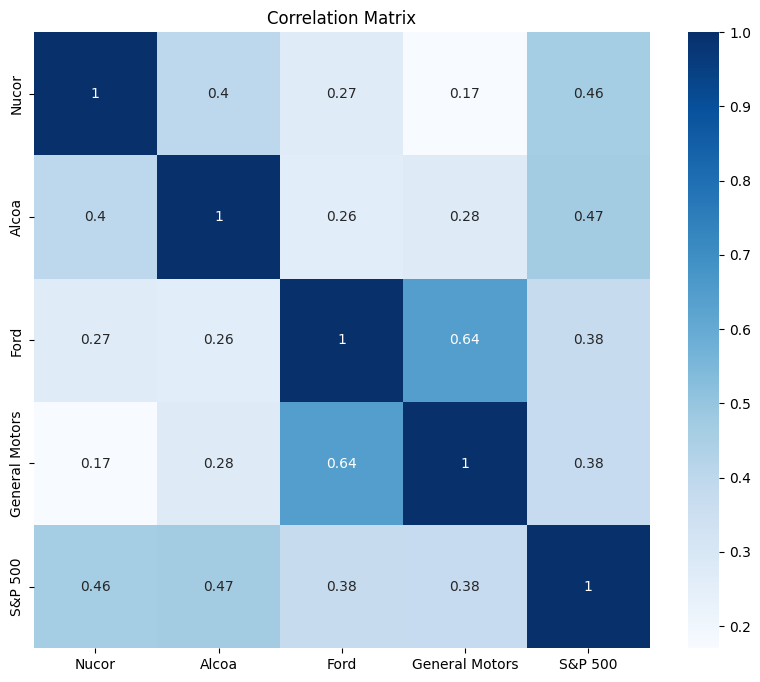

In [47]:
correlation_matrix = pd.DataFrame({
    'Nucor': nucor['Returns'],
    'Alcoa': alcoa['Returns'],
    'Ford': ford['Returns'],
    'General Motors': general_motors['Returns'],
    'S&P 500': sp500['Returns']
}).corr()


plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', square=True)
plt.title('Correlation Matrix')
plt.show()

- **Nucor & Alcoa:** Moderate correlation (0.4) due to shared exposure to metal tariffs.
- **Ford & GM:** Strong correlation (0.64) reflecting similar industry dynamics.
- **S&P 500:** Moderate correlation with all stocks, highest with Alcoa (0.47) and Nucor (0.46), indicating broader market influence.

Tariffs impact industries differently, with metal producers aligning more closely with the market than automakers.

## (Bonus) Machine Learning

In [48]:
for name, df in stocks.items():
    X = df[['Open', 'High', 'Low', 'Close']].shift(1).dropna()
    y = df.loc[X.index, 'Close']
    y = y.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    y_train = y_train.ravel()
    y_test = y_test.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    print(f"\n{name} model score: {model.score(X_test, y_test)}")

    last_day_data = df[['Open', 'High', 'Low', 'Close']].iloc[-1].values.reshape(1, -1)
    next_day_prediction = model.predict(last_day_data)

    print(f"{name} predicted closing price for the next day: {next_day_prediction[0]}")


Nucor model score: 0.9458990368517144
Nucor predicted closing price for the next day: 131.8699349975586

Alcoa model score: 0.940958433248
Alcoa predicted closing price for the next day: 32.37246772766113

Ford model score: 0.7387619083081522
Ford predicted closing price for the next day: 9.686195936203003

General Motors model score: 0.888613391548147
General Motors predicted closing price for the next day: 48.12259132385254

S&P 500 model score: 0.9156305177378378
S&P 500 predicted closing price for the next day: 5596.975600585937


## Next steps for investors

1. Stay updated on any changes to U.S. trade policies, including potential adjustments to tariffs.
2. Watch for demand recovery in key sectors (e.g. construction, automotive) that could benefit steel and aluminum producers.
3. Monitor international trade relationships and retaliatory measures from key trading partners like Canada.
4. Pay attention to upcoming earnings reports for insights into how they are managing tariff-related challenges and economic pressures.